In [ ]:
%pip install sdv

In [ ]:
import pandas as pd
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer

In [ ]:
# Load the PCOS dataset from a CSV file
# Replace 'pcos_dataset.csv' with the actual file path to your dataset
# df = pd.read_csv('pcos_train.csv')
df = pd.read_csv('pcos_train_select.csv')


In [ ]:
# Define metadata to specify the data types of each column
metadata = SingleTableMetadata()

# Add numerical columns
# metadata.add_column('age', sdtype='numerical')
# metadata.add_column('BMI', sdtype='numerical')
# metadata.add_column('period_last', sdtype='numerical')
# metadata.add_column('period_intervial', sdtype='numerical')

# Add categorical columns
# metadata.add_column('have_weight_gain', sdtype='categorical')
metadata.add_column('have_ex_bodyhair_growth', sdtype='categorical')
# metadata.add_column('have_darkening_skin', sdtype='categorical')
# metadata.add_column('have_hair_loss', sdtype='categorical')
# metadata.add_column('have_pimples', sdtype='categorical')
# metadata.add_column('have_consume_fastfood', sdtype='categorical')
metadata.add_column('have_exercise', sdtype='categorical')
# metadata.add_column('have_mood_swings', sdtype='categorical')
metadata.add_column('have_regular_periods', sdtype='categorical')
metadata.add_column('blood_group_A+', sdtype='categorical')
# metadata.add_column('blood_group_A-', sdtype='categorical')
metadata.add_column('blood_group_B+', sdtype='categorical')
# metadata.add_column('blood_group_B-', sdtype='categorical')
metadata.add_column('blood_group_O+', sdtype='categorical')
# metadata.add_column('blood_group_O-', sdtype='categorical')
metadata.add_column('PCOS_diagnosis', sdtype='categorical')



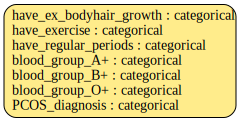

In [ ]:
metadata.visualize()

In [ ]:
metadata.validate()

In [ ]:
# Initialize the CTGAN synthesizer with the metadata
synthesizer = CTGANSynthesizer(metadata, epochs=500, verbose=True)

# Train the synthesizer on the dataset
synthesizer.fit(df)



/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:119: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:104: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.

Gen. (-0.02) | Discrim. (0.00): 100%|██████████| 500/500 [00:41<00:00, 12.05it/s]


In [ ]:
# Save the ckpoint
synthesizer.save(
    filepath='pcos_synthesizer.pkl'
)

In [ ]:
# loac the ckpoint
synthesizer = CTGANSynthesizer.load(
    filepath='pcos_synthesizer.pkl'
)

In [ ]:
# Generate synthetic data (e.g., 1000 rows)
synthetic_data = synthesizer.sample(num_rows=1000)


In [ ]:

# Optionally, save the synthetic data to a CSV file
synthetic_data.to_csv('synthetic_pcos_dataset.csv', index=False)

print("Synthetic data generated successfully!")

Synthetic data generated successfully!


In [ ]:
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality
from sdv.evaluation.single_table import get_column_plot

In [ ]:
# 1. perform basic validity checks
diagnostic = run_diagnostic(df, synthetic_data, metadata)

# 2. measure the statistical similarity
quality_report = evaluate_quality(df, synthetic_data, metadata)


Generating report ...

(1/2) Evaluating Data Validity: |██████████| 7/7 [00:00<00:00, 685.70it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 183.09it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 7/7 [00:00<00:00, 452.87it/s]|
Column Shapes Score: 94.21%

(2/2) Evaluating Column Pair Trends: |██████████| 21/21 [00:00<00:00, 113.91it/s]|
Column Pair Trends Score: 90.01%

Overall Score (Average): 92.11%



# KSComplement
This metric computes the similarity of a real column vs. a synthetic column in terms of the column shapes -- aka the marginal distribution or 1D histogram of the column.
Reference: https://docs.sdv.dev/sdmetrics/metrics/metrics-glossary/kscomplement

In [ ]:
quality_report.get_details(property_name='Column Shapes')

,Column,Metric,Score
0,have_ex_bodyhair_growth,TVComplement,0.956774
1,have_exercise,TVComplement,0.983077
2,have_regular_periods,TVComplement,0.962656
3,blood_group_A+,TVComplement,0.954799
4,blood_group_B+,TVComplement,0.880635
5,blood_group_O+,TVComplement,0.893978
6,PCOS_diagnosis,TVComplement,0.963000


In [ ]:

# 3. plot the data
fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    metadata=metadata,
    column_name='PCOS_diagnosis',
)

fig.show()